In [1]:
from google.colab import files
files.upload()

Saving titanic.csv to titanic.csv


{'titanic.csv': b'PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked\r\n892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,,Q\r\n893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47,1,0,363272,7,,S\r\n894,0,2,"Myles, Mr. Thomas Francis",male,62,0,0,240276,9.6875,,Q\r\n895,0,3,"Wirz, Mr. Albert",male,27,0,0,315154,8.6625,,S\r\n896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22,1,1,3101298,12.2875,,S\r\n897,0,3,"Svensson, Mr. Johan Cervin",male,14,0,0,7538,9.225,,S\r\n898,1,3,"Connolly, Miss. Kate",female,30,0,0,330972,7.6292,,Q\r\n899,0,2,"Caldwell, Mr. Albert Francis",male,26,1,1,248738,29,,S\r\n900,1,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18,0,0,2657,7.2292,,C\r\n901,0,3,"Davies, Mr. John Samuel",male,21,2,0,A/4 48871,24.15,,S\r\n902,0,3,"Ilieff, Mr. Ylio",male,,0,0,349220,7.8958,,S\r\n903,0,1,"Jones, Mr. Charles Cresson",male,46,0,0,694,26,,S\r\n904,1,1,"Snyder, Mrs. John Pillsbury (Nelle Stevenson)",female,23,1,0,21228,82.

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv("titanic.csv")
print(df.head())
print(df.info())
print(df.isnull().sum())

   PassengerId  Survived  Pclass  \
0          892         0       3   
1          893         1       3   
2          894         0       2   
3          895         0       3   
4          896         1       3   

                                           Name     Sex   Age  SibSp  Parch  \
0                              Kelly, Mr. James    male  34.5      0      0   
1              Wilkes, Mrs. James (Ellen Needs)  female  47.0      1      0   
2                     Myles, Mr. Thomas Francis    male  62.0      0      0   
3                              Wirz, Mr. Albert    male  27.0      0      0   
4  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0      1      1   

    Ticket     Fare Cabin Embarked  
0   330911   7.8292   NaN        Q  
1   363272   7.0000   NaN        S  
2   240276   9.6875   NaN        Q  
3   315154   8.6625   NaN        S  
4  3101298  12.2875   NaN        S  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (

In [3]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [4]:
# Fill missing Age with median
df['Age'].fillna(df['Age'].median(), inplace=True)

# Fill missing Embarked with mode
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Drop Cabin column (too many missing values)
df.drop(columns=['Cabin'], inplace=True)

# Drop irrelevant columns
df.drop(columns=['PassengerId', 'Name', 'Ticket'], inplace=True)

# Verify
print(df.isnull().sum())
print(df.head())


Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        1
Embarked    0
dtype: int64
   Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked
0         0       3    male  34.5      0      0   7.8292        Q
1         1       3  female  47.0      1      0   7.0000        S
2         0       2    male  62.0      0      0   9.6875        Q
3         0       3    male  27.0      0      0   8.6625        S
4         1       3  female  22.0      1      1  12.2875        S


/tmp/ipython-input-1343304461.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
/tmp/ipython-input-1343304461.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

In [5]:
# Convert 'Sex' to numeric (male=0, female=1)
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

# One-hot encoding for 'Embarked'
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)

print(df.head())


   Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked_Q  Embarked_S
0         0       3    0  34.5      0      0   7.8292        True       False
1         1       3    1  47.0      1      0   7.0000       False        True
2         0       2    0  62.0      0      0   9.6875        True       False
3         0       3    0  27.0      0      0   8.6625       False        True
4         1       3    1  22.0      1      1  12.2875       False        True


In [6]:
from sklearn.model_selection import train_test_split

X = df.drop('Survived', axis=1)  # features
y = df['Survived']               # target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)


Train shape: (334, 8)
Test shape: (84, 8)


In [10]:
df['Fare'].fillna(df['Fare'].median(), inplace=True)



/tmp/ipython-input-3555093691.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Fare'].fillna(df['Fare'].median(), inplace=True)


In [11]:
print(df.isnull().sum())


Survived      0
Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Embarked_Q    0
Embarked_S    0
dtype: int64


In [14]:
# Drop unnecessary string columns
df.drop(columns=['Name', 'Ticket'], inplace=True, errors='ignore')

# (We already dropped 'Cabin' earlier)
print(df.head())


   PassengerId  Survived  Pclass     Sex   Age  SibSp  Parch     Fare Cabin  \
0          892         0       3    male  34.5      0      0   7.8292   NaN   
1          893         1       3  female  47.0      1      0   7.0000   NaN   
2          894         0       2    male  62.0      0      0   9.6875   NaN   
3          895         0       3    male  27.0      0      0   8.6625   NaN   
4          896         1       3  female  22.0      1      1  12.2875   NaN   

  Embarked  
0        Q  
1        S  
2        Q  
3        S  
4        S  


In [15]:
print(df.dtypes)


PassengerId      int64
Survived         int64
Pclass           int64
Sex             object
Age            float64
SibSp            int64
Parch            int64
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [16]:
df.drop(columns=['PassengerId', 'Cabin'], inplace=True, errors='ignore')
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)
print(df.dtypes)


Survived        int64
Pclass          int64
Sex             int64
Age           float64
SibSp           int64
Parch           int64
Fare          float64
Embarked_Q       bool
Embarked_S       bool
dtype: object


In [18]:
print(df.isnull().sum())


Survived       0
Pclass         0
Sex            0
Age           86
SibSp          0
Parch          0
Fare           1
Embarked_Q     0
Embarked_S     0
dtype: int64


In [19]:
# Fill Age with median
df['Age'].fillna(df['Age'].median(), inplace=True)

# Fill Fare with median
df['Fare'].fillna(df['Fare'].median(), inplace=True)

# Final check
print(df.isnull().sum())


Survived      0
Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Embarked_Q    0
Embarked_S    0
dtype: int64


/tmp/ipython-input-488919586.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
/tmp/ipython-input-488919586.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Features & target
X = df.drop('Survived', axis=1)
y = df['Survived']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


✅ Accuracy: 1.0

Confusion Matrix:
 [[50  0]
 [ 0 34]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        34

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84



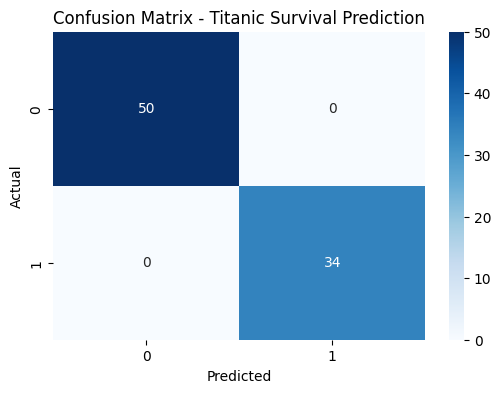

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Titanic Survival Prediction")
plt.show()


/tmp/ipython-input-724780318.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=coefficients, palette="viridis")


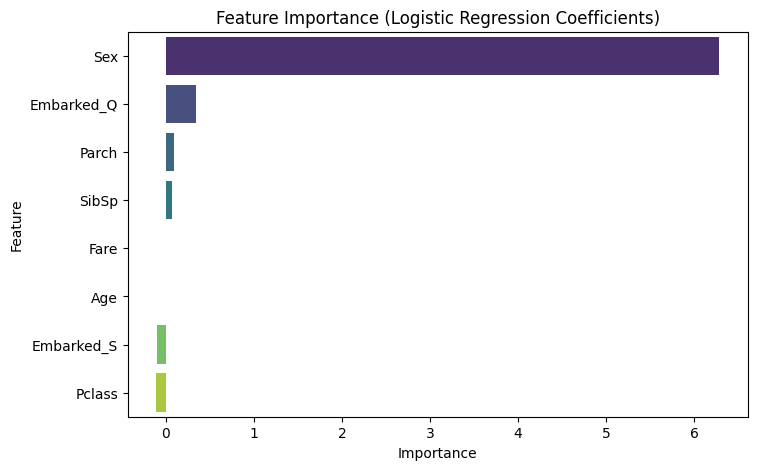

In [22]:
# Get feature importance
coefficients = pd.DataFrame({
    "Feature": X.columns,
    "Importance": model.coef_[0]
}).sort_values(by="Importance", ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x="Importance", y="Feature", data=coefficients, palette="viridis")
plt.title("Feature Importance (Logistic Regression Coefficients)")
plt.show()


/tmp/ipython-input-2407201517.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Sex", y="Survived", data=df, palette="Set2")


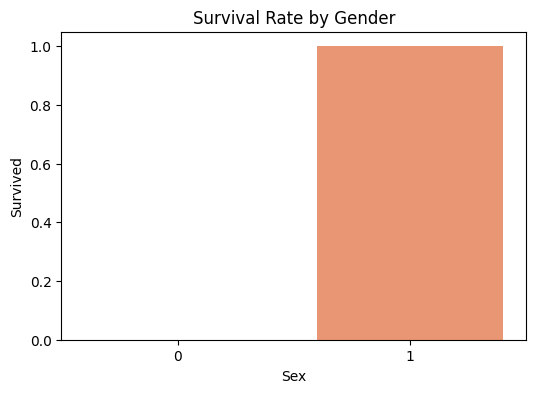

In [23]:
plt.figure(figsize=(6,4))
sns.barplot(x="Sex", y="Survived", data=df, palette="Set2")
plt.title("Survival Rate by Gender")
plt.show()


/tmp/ipython-input-1020592545.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Pclass", y="Survived", data=df, palette="Set1")


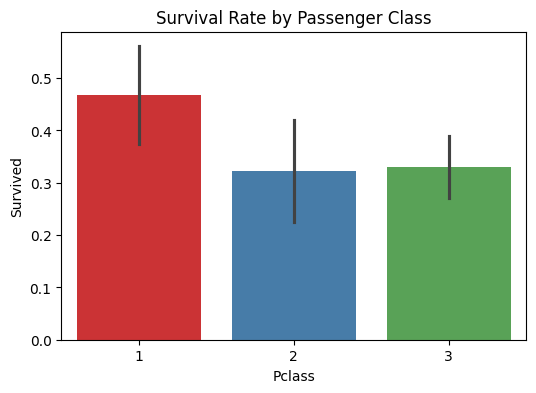

In [24]:
plt.figure(figsize=(6,4))
sns.barplot(x="Pclass", y="Survived", data=df, palette="Set1")
plt.title("Survival Rate by Passenger Class")
plt.show()


Step 1: Import Libraries  
 Imported all the essential Python libraries for this project:  
- pandas and numpy for handling and manipulating data  
- matplotlib and seaborn for visualizing patterns and results  
- sklearn for splitting data, training the Logistic Regression model, and evaluating its performance


Step 2: Load Dataset  
 Uploaded and loaded the Titanic dataset. I previewed the first few rows to understand the structure of the data.

 Step 3: Explore the Data  
examined the data types and the number of non-null values in each column.  
I also checked for missing values to identify which columns needed cleaning before modeling.

Step 4: Data Cleaning  
 Handled missing values by filling Age and Fare with their median values, and Embarked with its mode.  
and dropped irrelevant columns like PassengerId, Name, Ticket, and Cabin because they were not useful for predicting survival.  
After this, the dataset was clean and ready for further analysis.

Step 5: Feature Encoding  
Then  converted categorical features into numeric format so the model could process them.  
- mapped Sex to 0 for male and 1 for female  
- applied one-hot encoding to Embarked  
This ensured that all columns were numeric and suitable for Logistic Regression.


Step 8: Train Logistic Regression  
trained a Logistic Regression model using the training data.  
After training,  made predictions on the test set and evaluated the model using accuracy, confusion matrix, and classification report.


Step 9: Confusion Matrix Heatmap  
after that visualized the confusion matrix using a heatmap to see where the model predicted correctly and where it made errors.

Step 10: Feature Importance  
then examined which features most influenced survival using the Logistic Regression coefficients.  
Positive coefficients indicated higher chances of survival, while negative coefficients indicated lower chances.

Step 11: Survival Analysis Visualizations  
after that  explored patterns in survival using different visualizations:  
- Survival rates by gender  
- Survival rates by passenger class  
These visualizations helped me understand which factors affected survival on the Titanic.

Step 12: Insights & Observations  
- Females had higher survival chances than males  
- First-class passengers survived more than second or third class  

Challenges Faced:
- Missing values were present in multiple columns, including Age, Fare, and Embarked, which caused errors during model training.
- Non-numeric data, such as Name, Cabin, and Ticket, needed to be dropped or encoded to make the dataset suitable for Logistic Regression.
- Convergence warnings appeared during Logistic Regression training due to initial scaling and iterations.
- NaN values persisted even after initial cleaning, requiring multiple checks and imputation steps.
- Categorical features like Sex and Embarked needed proper encoding before model training.
- Multiple iterations of data cleaning and preprocessing were necessary to ensure the dataset was fully numeric and complete.
- Visualization required careful handling to make insights clear and interpretable, especially for survival analysis by different factors.

 Conclusion  
This project demonstrates a complete machine learning workflow:  
1. Data cleaning and preprocessing  
2. Feature encoding and engineering  
3. Train/test split  
4. Logistic Regression model training  
5. Evaluation and visualization  
6. Insights and observations  

Key takeaways:  
- Sex, Pclass, Age,and Fare were important features influencing survival  
- Combining modeling with visualization provided both predictive power and interpretable insights  
- Proper handling of missing values and categorical encoding was essential for the model's performance











